Analog Butterwoth Filter

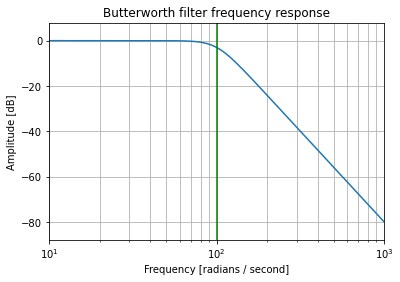

In [4]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

array([[-1.15 , -0.645],
       [-1.17 , -0.6  ],
       [-1.17 , -0.565],
       ...,
       [-0.945, -0.5  ],
       [-0.96 , -0.505],
       [-0.955, -0.515]])

{'fs': 360,
 'sig_len': 1100,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V1'],
 'comments': ['69 M 1456 653 x2',
  'Digoxin, Norpace',
  'The PVCs are multiform.']}

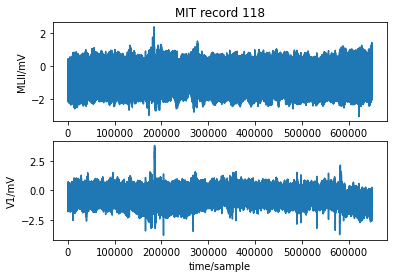

{'record_name': '118',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1456 653 x2',
  'Digoxin, Norpace',
  'The PVCs are multiform.'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[-0.835, -0.515],
        [-0.835, -0.515],
        [-0.835, -0.515],
        ...,
        [ 0.03 , -2.1  ],
        [ 0.085, -2.14 ],
        [ 0.   , -2.56 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['118.dat', '118.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [857, 921],
 'checksum': [8669, -25621],
 'block_size': [0, 0]}

In [7]:
from IPython.display import display
import os
import shutil
import posixpath

import wfdb

sig, fields = wfdb.rdsamp('118', channels=[0,1], sampfrom=100, sampto=1200)
display(sig)
display(fields)

record = wfdb.rdrecord('118') 
wfdb.plot_wfdb(record=record, title='MIT record 118') 
display(record.__dict__)

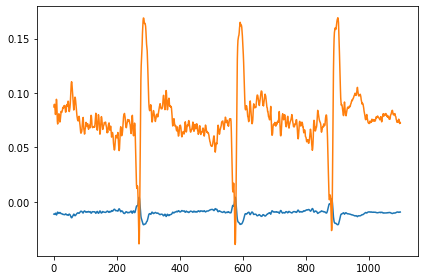

array([[-0.01121115,  0.08721072],
       [-0.01140613,  0.08927548],
       [-0.01140613,  0.08961669],
       ...,
       [-0.00921264,  0.07195713],
       [-0.00935888,  0.07312794],
       [-0.00931013,  0.07262393]])

In [9]:
sos = signal.butter(10, 250, 'hp', fs=1200, output='sos')
filtered = signal.sosfilt(sos, sig)

plt.plot(filtered)

plt.tight_layout()
plt.show()
display(filtered)